# CHEOPS secondary eclipse modelling
## Case a: Mixed reflection and thermal emission

**Author:** Hannu Parviainen<br>
**Last edited:** 2.8.2021

While the TESS photometry coveres the whole KELT-1b phase, the CHEOPS photometry covers only the near vicinity of the secondary eclipse. This means that we can't estimate the ellipsoidal variations or Doppler boosting independently for the CHEOPS passband.

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from multiprocessing import Pool
from src import CHEOPSLPF

In [4]:
lpf = CHEOPSLPF('d')

In [5]:
def lnposterior(pv):
    return squeeze(lpf.lnposterior(pv))

pool = Pool(processes=20)

In [4]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1622316483, σ = 0.000372331790583384) [    -inf ..      inf],
   1 |G| p              N(μ = 1.2174942697664664, σ = 1.9141101120460627e-07) [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5767422571219982, σ = 0.03814868703121746) [    0.00 ..      inf],
   3 |G| b              N(μ = 0.3237792602250023, σ = 0.07586994955590337) [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.005835660869130073, σ = 6.212974802685548e-05) [    0.00 ..      inf],
   7 |G| oev            N(μ = -3.115912780575014e-09, σ = 9.784848300851806e-08) [    -inf ..      inf],
   8 |G| aev_cheops     N(μ = 1e-09, σ = 1e-11)                  [    0.00 ..      inf],
   9 |G| adb_cheops     N(μ = 1e-09, σ = 1e-11)                  [    0.00 ..      inf],
  10 |G| ted_cheops     U(a = 0.0, b

## Find the global posterior mode

Global optimisation:   0%|          | 0/150 [00:00<?, ?it/s]

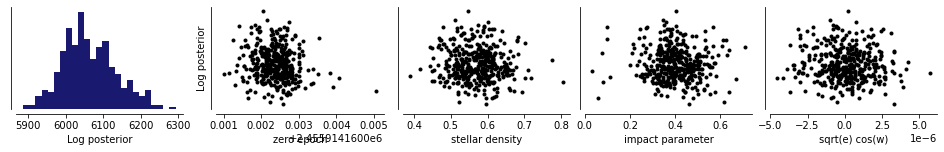

In [6]:
lpf.optimize_global(150, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

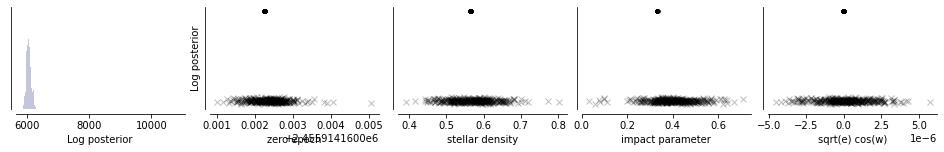

In [7]:
lpf.optimize_global(15000, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

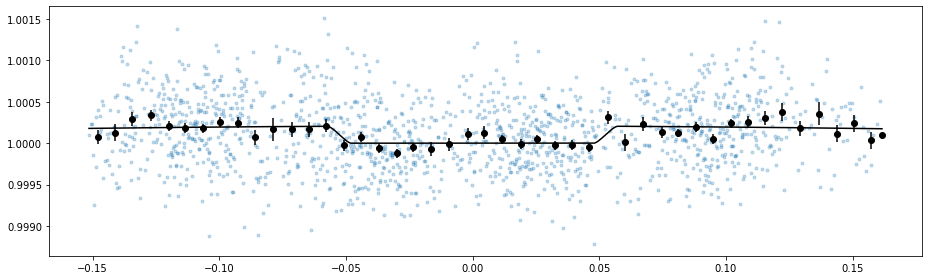

In [8]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [9]:
lpf.sample_mcmc(5000, 100, repeats=10, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

MCMC sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Run 1/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 2/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 3/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 4/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 5/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 6/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 7/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 8/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 9/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


Run 10/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Could not save the samples in fits format.


In [9]:
df = lpf.posterior_samples()

<AxesSubplot:>

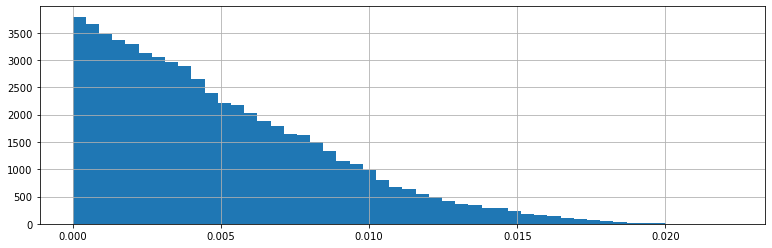

In [10]:
df.ted_cheops.hist(bins=50)

<AxesSubplot:>

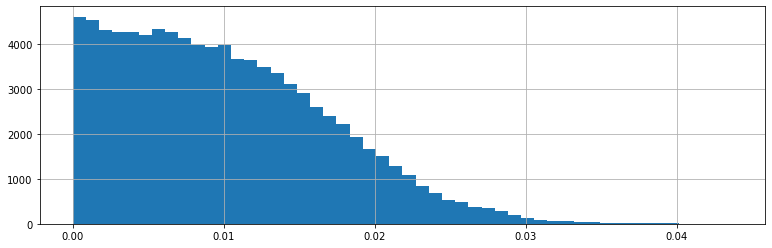

In [65]:
df.ted_cheops.hist(bins=50)

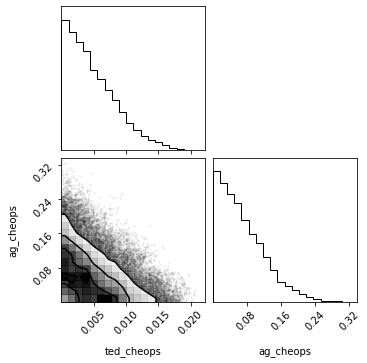

In [11]:
from corner import corner
corner(df[['ted_cheops','ag_cheops']]);

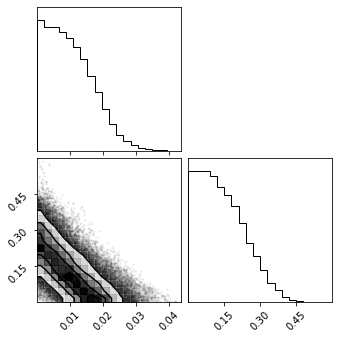

In [66]:
from corner import corner
corner(df[['ted_cheops','ag_cheops']]);

In [25]:
lpf.save()

<AxesSubplot:>

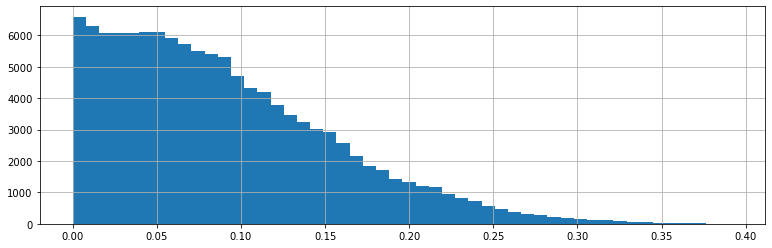

In [26]:
df.ag.hist(bins=50)

In [35]:
lpf.save()

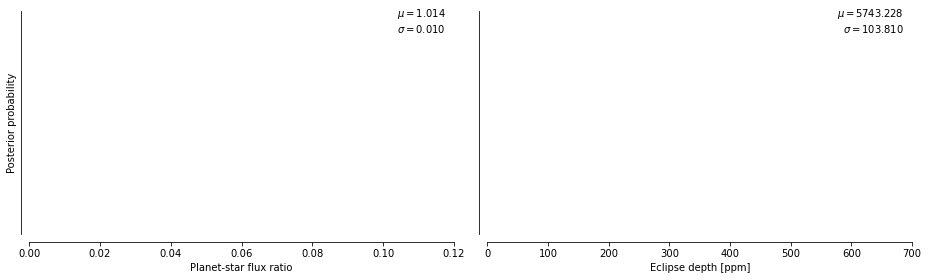

In [18]:
fig = lpf.plot_posteriors(truncate=False, nsamples=600);

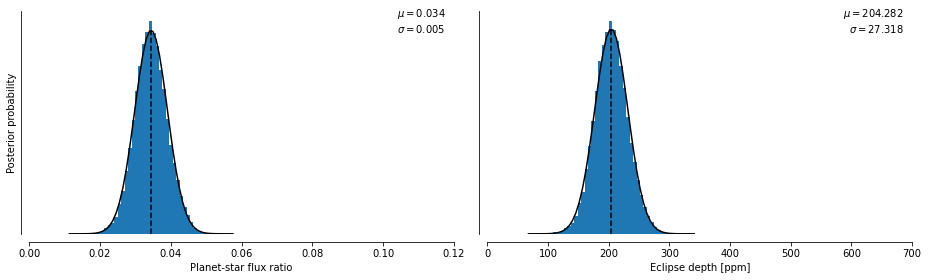

In [59]:
fig = lpf.plot_posteriors(truncate=False, nsamples=300);
fig.savefig(f'kelt_1_tw_logistic_joint_posteriors.png')

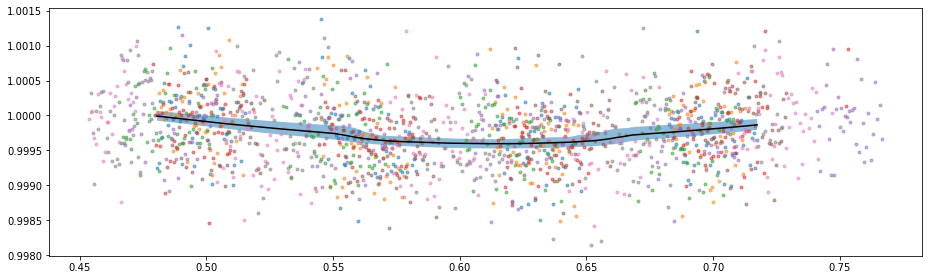

In [27]:
fig = lpf.plot_folded_eclipse_model('mcmc')
#fig.savefig(f'kelt_1_tw_logistic_joint_model_posterior.png')

In [22]:
from pytransit.lpf.tesslpf import downsample_time
from pytransit.utils.misc import fold

In [23]:
df = lpf.posterior_samples(derived_parameters=False)

AttributeError: 'NoneType' object has no attribute 'chain'

In [30]:
phase = (fold(lpf.timea, df.p.mean(), df.tc.mean()) - 0.5)*df.p.mean()

In [31]:
sids = argsort(phase)

In [32]:
oflux = lpf.ofluxa / lpf.baseline(df.median().values)

In [43]:
pb, fb, eb = downsample_time(phase[sids], oflux[sids], 0.025)

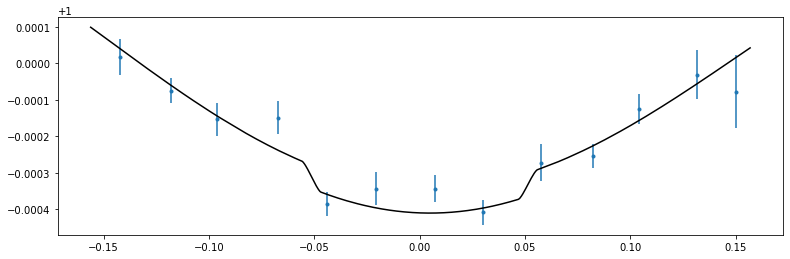

In [44]:
errorbar(pb, fb, eb, fmt='.')
plot(phase[sids], lpf.transit_model(df.median())[sids], 'k')

In [35]:
df.lm_i__0

,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0
0,1.000320,1.000357,1.000311,1.000371,1.000356,1.000430,1.000297,1.000282
1,1.000321,1.000375,1.000312,1.000376,1.000366,1.000420,1.000303,1.000249
2,1.000313,1.000351,1.000288,1.000367,1.000348,1.000425,1.000287,1.000243
3,1.000306,1.000352,1.000297,1.000367,1.000356,1.000422,1.000292,1.000245
4,1.000305,1.000349,1.000294,1.000359,1.000341,1.000420,1.000289,1.000235
...,...,...,...,...,...,...,...,...
59995,1.000324,1.000336,1.000331,1.000297,1.000238,1.000426,1.000247,1.000276
59996,1.000357,1.000339,1.000352,1.000313,1.000268,1.000424,1.000277,1.000288
59997,1.000360,1.000349,1.000356,1.000314,1.000269,1.000429,1.000284,1.000299
59998,1.000347,1.000342,1.000343,1.000312,1.000267,1.000423,1.000280,1.000299


In [38]:
df.shape[1]

179

In [40]:
icols = [i for i in range(df.shape[1]) if 'lm_i__' in df.columns[i]]

<AxesSubplot:>

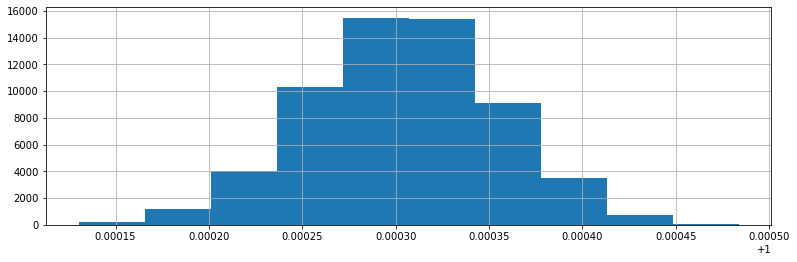

In [44]:
df.iloc[:,icols[0]].hist()

<AxesSubplot:>

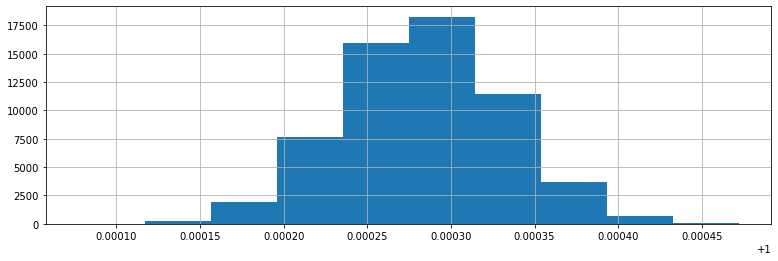

In [45]:
df.iloc[:,icols[1]].hist()

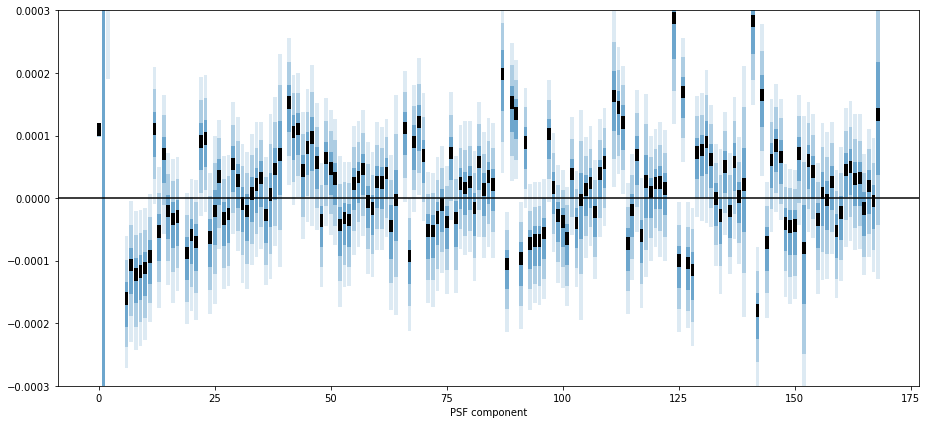

In [45]:
df = lpf.posterior_samples(derived_parameters=False)

fig, ax = subplots(figsize=(13,6))
bplot(df.iloc[:,10:])
ax.set_ylim(-0.0003, 0.0003)
setp(ax, xlabel='PSF component')
fig.tight_layout()

In [19]:
lpf.save()

---

<center>&copy;2020 Hannu Parviainen</center>